In [20]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_log_error

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Load Data

train = pd.read_csv('/content/drive/MyDrive/Pindahan/Jupyter Notebook/Projects/house-prices/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Pindahan/Jupyter Notebook/Projects/house-prices/test.csv')

### **Read Data**

In [23]:
# Look train Dataset

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
# Create a separator and merge dataset

train['class'] = 0
test['class'] = 1

data = train.merge(test, how='outer')
data['class'] = data['class'].astype('object')

In [25]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,class
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [27]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### **EDA and Preprocessing**

In [28]:
# Look Missing Value Ratio

nan_data = (data.isnull().sum() / len(data)) * 100
nan_data = nan_data.drop(nan_data[nan_data == 0].index).sort_values(ascending=False)[:30]
missed = pd.DataFrame({'% of nan': nan_data})
missed.head(20)

,% of nan
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageCond,5.447071
GarageYrBlt,5.447071
GarageFinish,5.447071


In [29]:
# Drop Columns with Missing Value Rate > 30% and drop id

data.drop(columns=['Id', 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'], axis=1, inplace=True)

In [30]:
# Check dataset with imbalanced category

for i in data.select_dtypes('object').columns:
  print(data[i].value_counts())

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64
Norm      2511
Feedr      164
Artery 

In [31]:
# drop columns

data.drop(['Utilities', 'Street'], axis=1, inplace=True)

In [32]:
# Fill Missing Value to Numerical Data and Categorical Data

data_num = data.select_dtypes(include=['int64', 'float64'])
data_num.fillna(data_num.median(), inplace=True)
data_cat = data.select_dtypes(exclude=['int64', 'float64'])

for i in data_cat.columns:
  data_cat[i].fillna(f'No {i}', inplace=True)
  data_cat[i].astype('category')

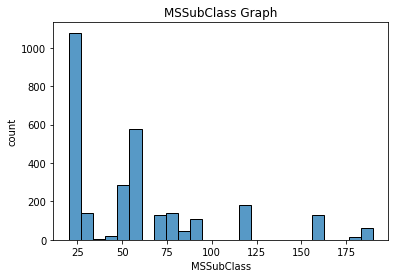

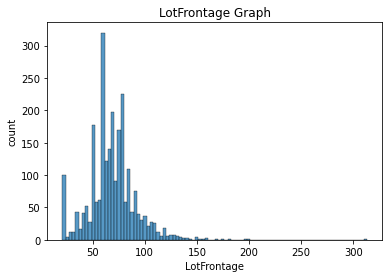

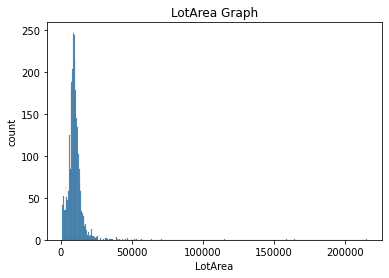

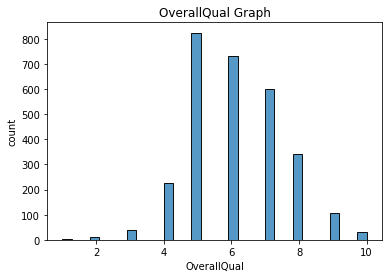

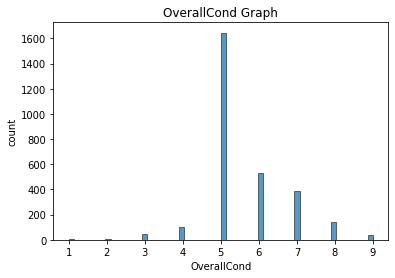

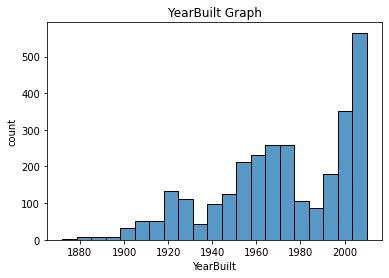

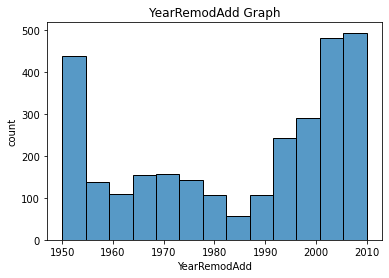

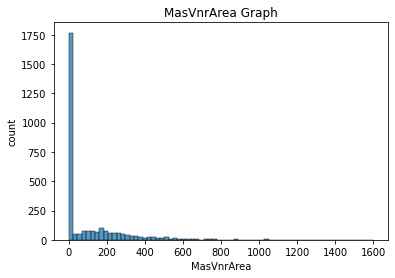

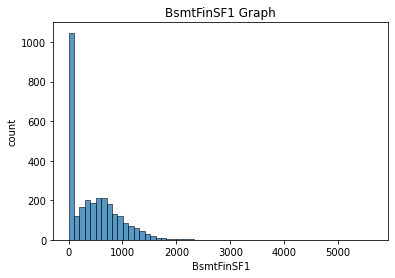

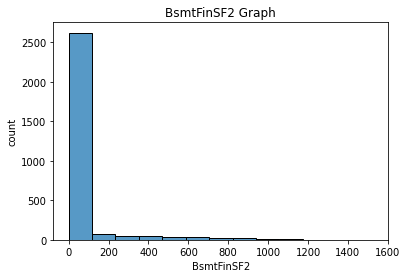

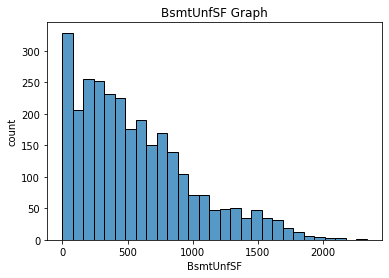

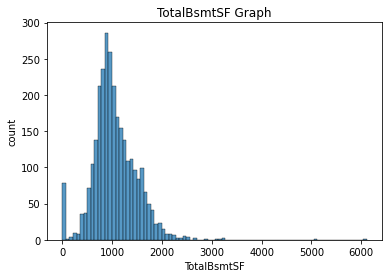

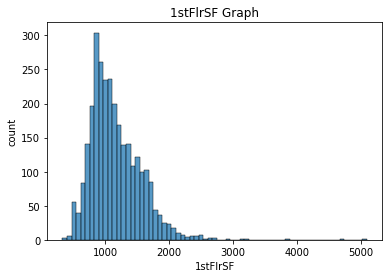

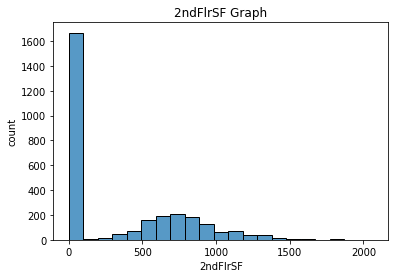

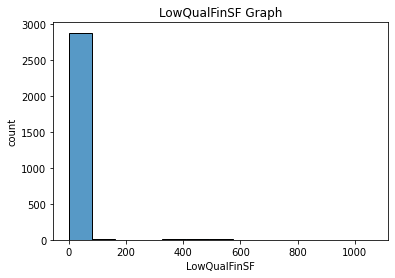

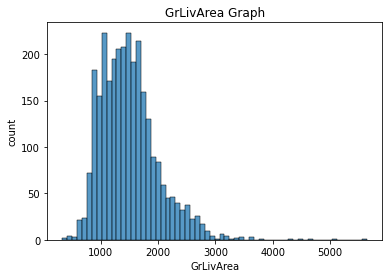

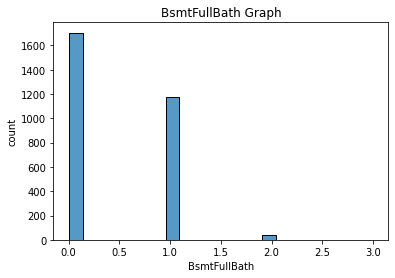

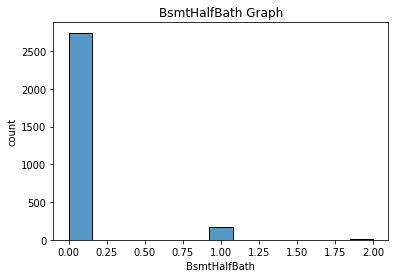

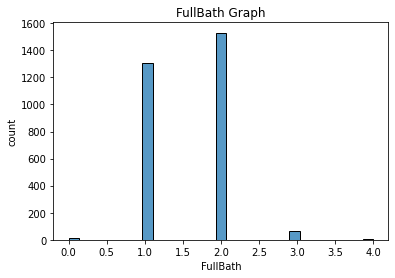

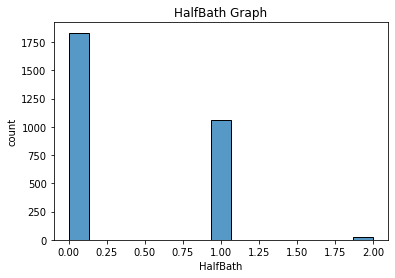

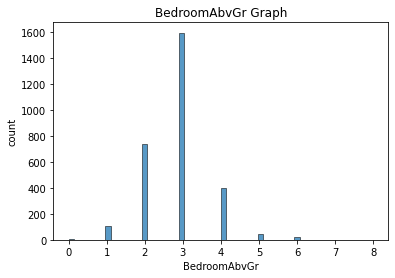

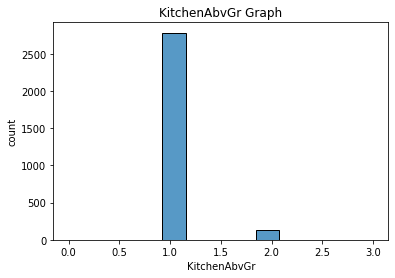

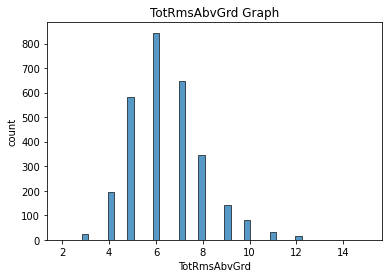

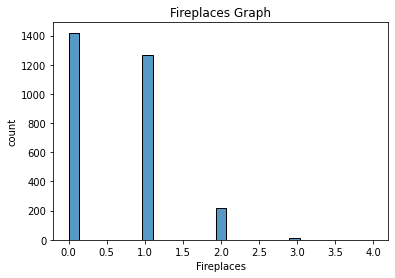

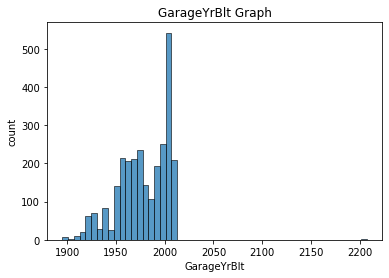

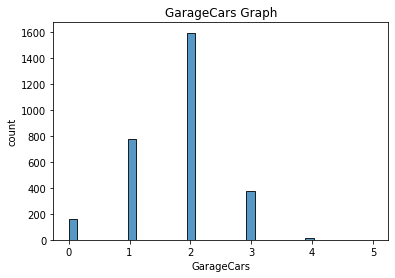

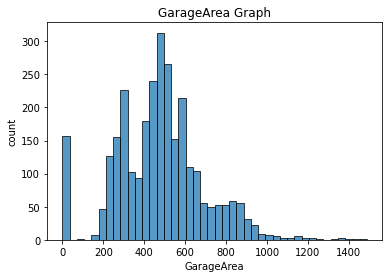

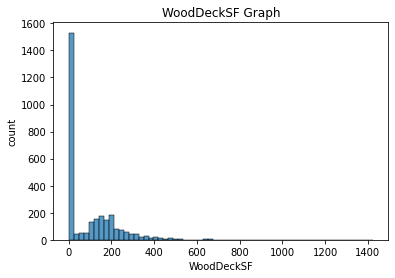

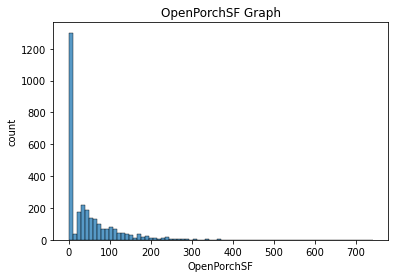

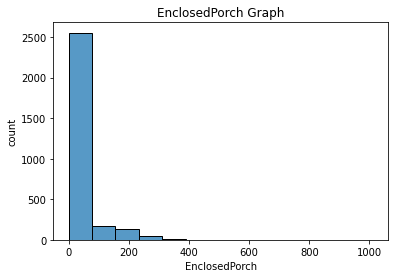

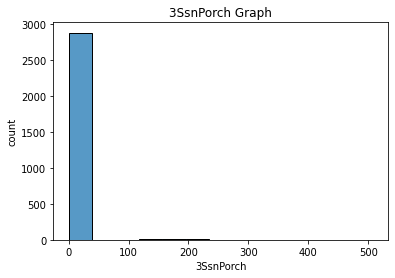

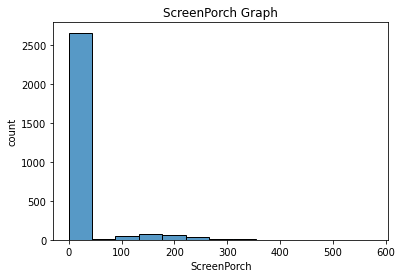

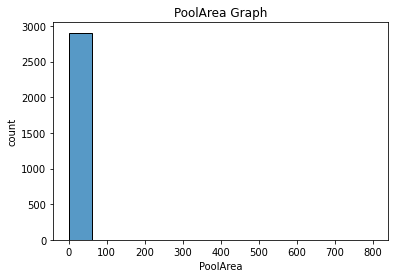

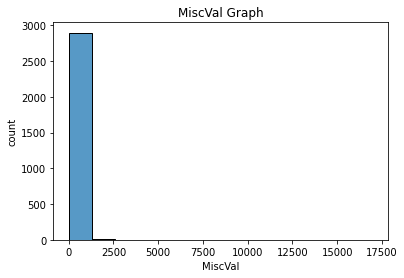

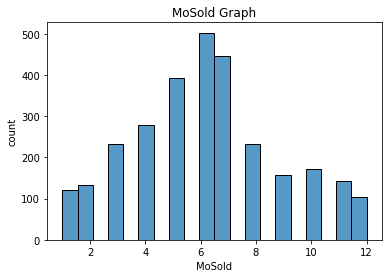

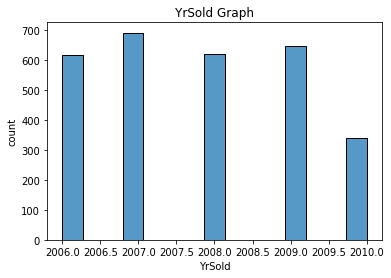

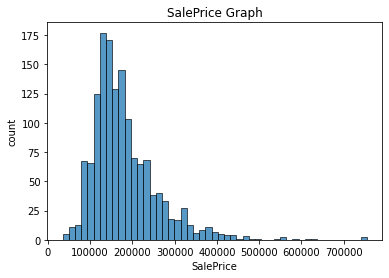

In [33]:
# Plot Numerical Data

for i in data_num.columns:
       plt.xlabel(i)
       plt.ylabel('count')
       plt.title(i + ' Graph')
       sns.histplot(data=data, x=data.loc[:,i])
       plt.show()

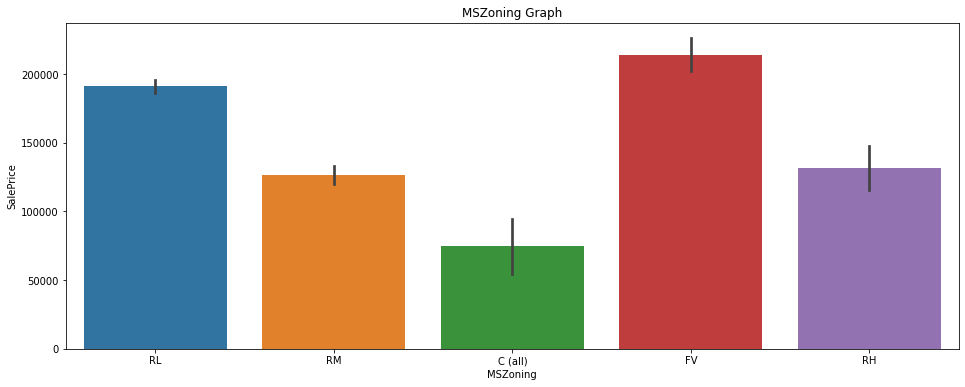

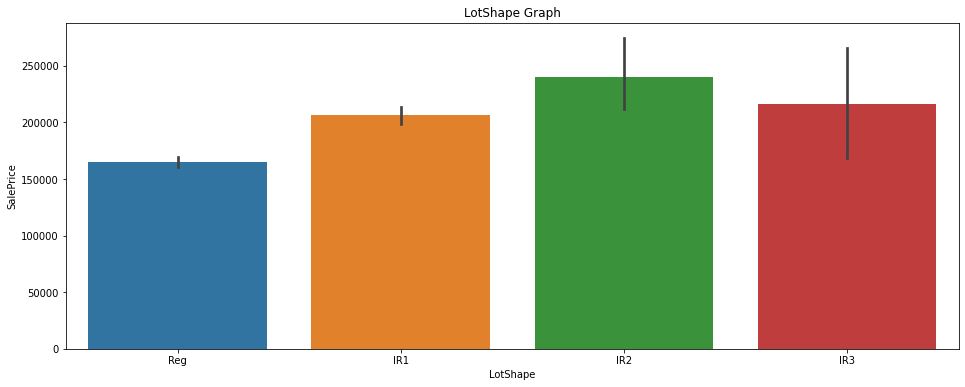

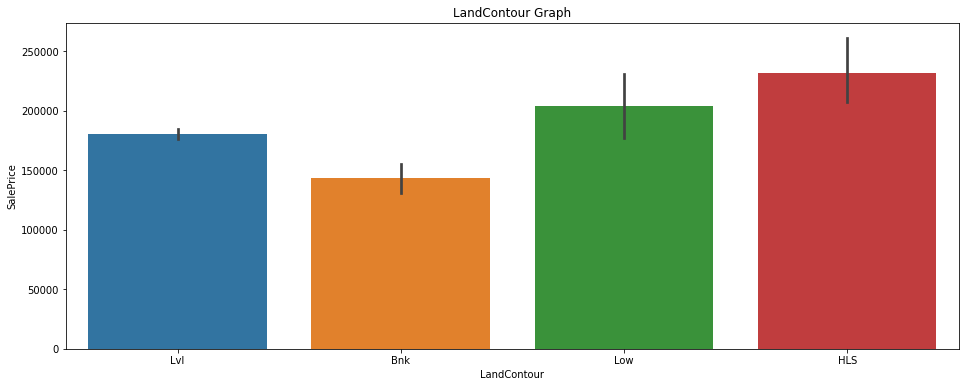

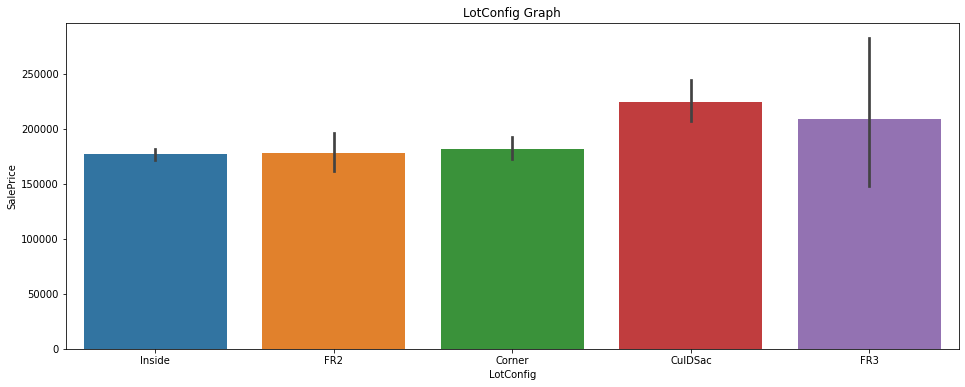

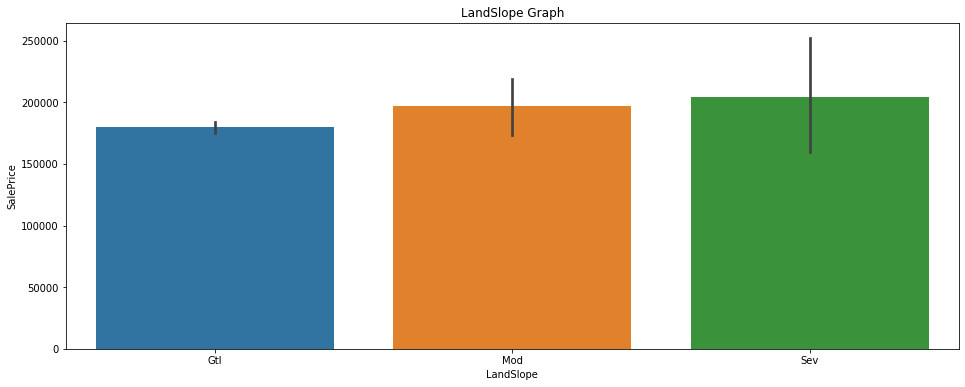

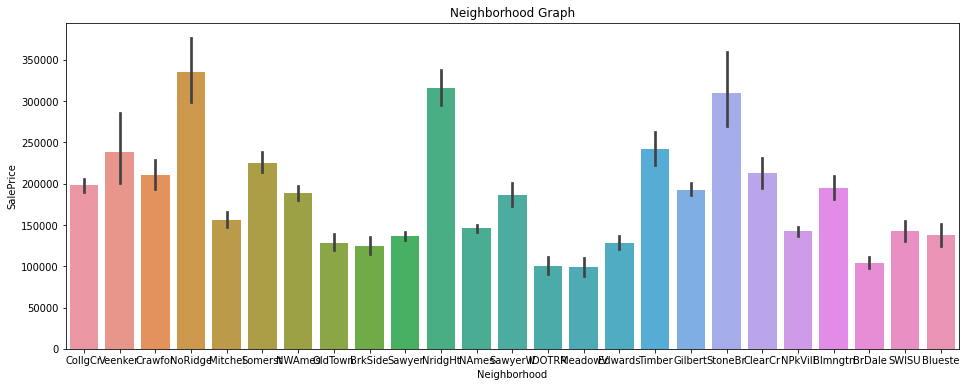

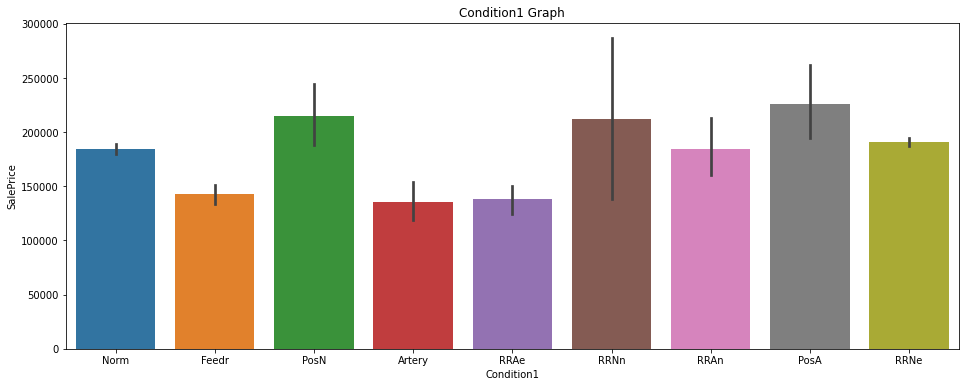

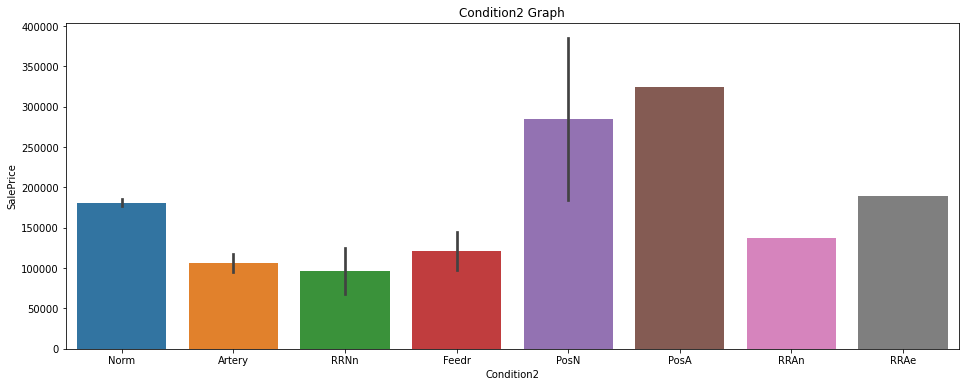

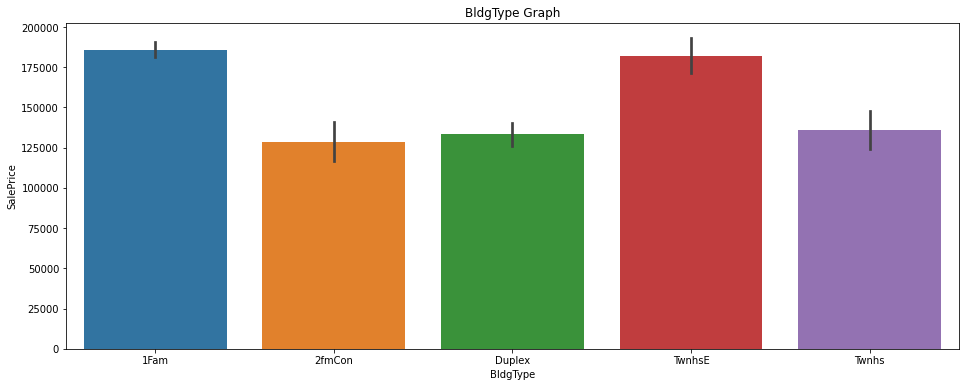

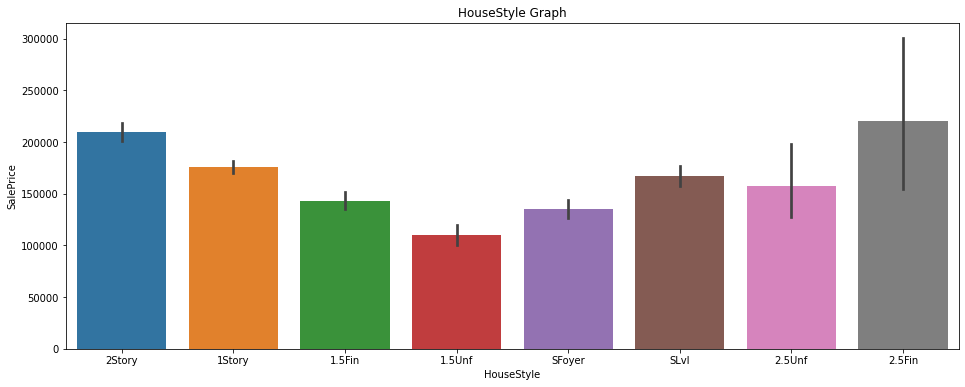

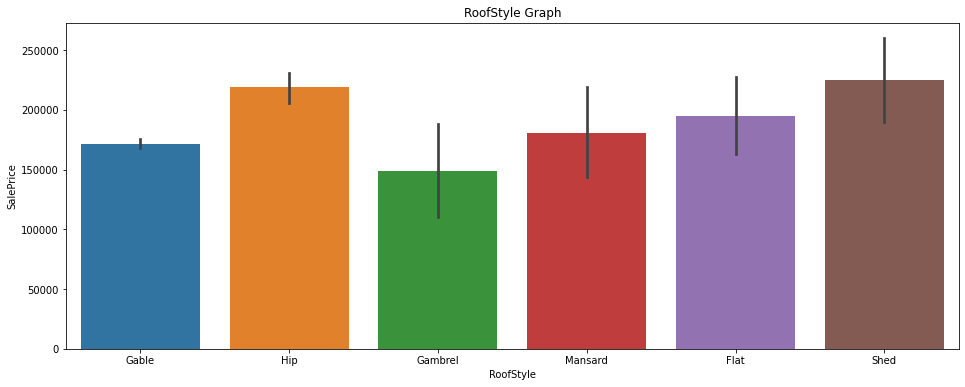

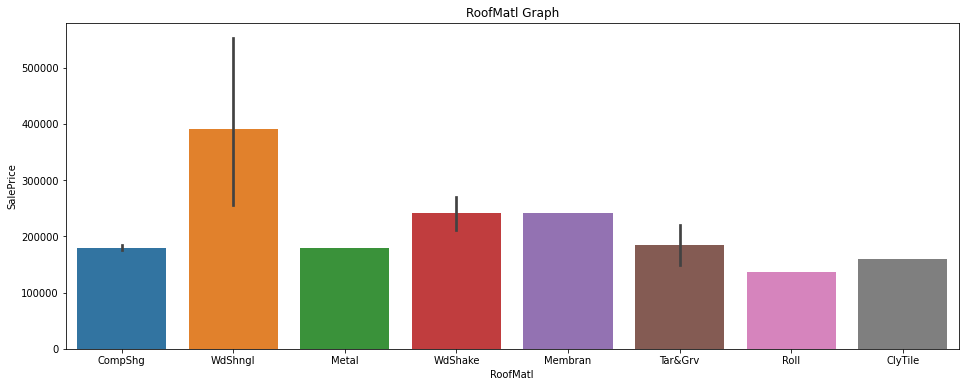

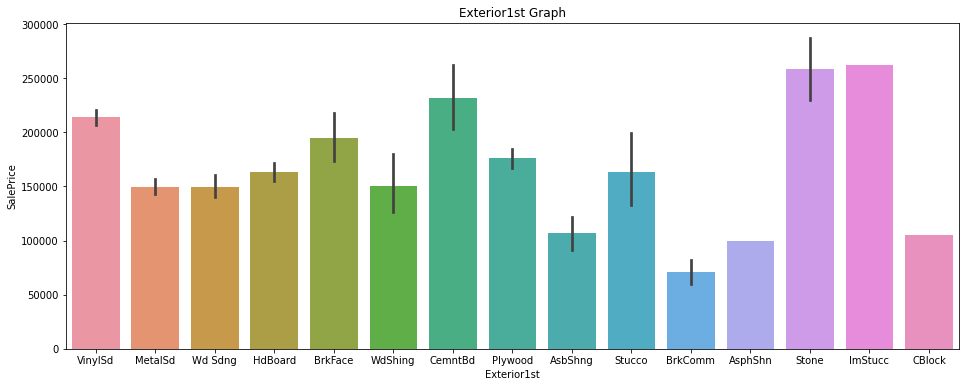

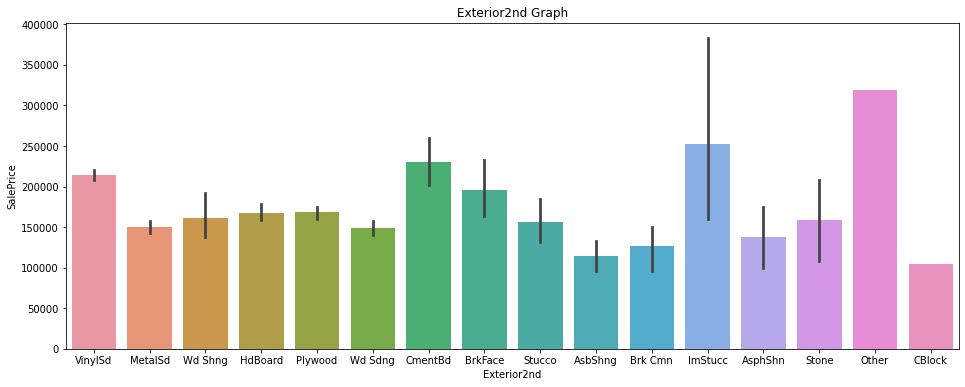

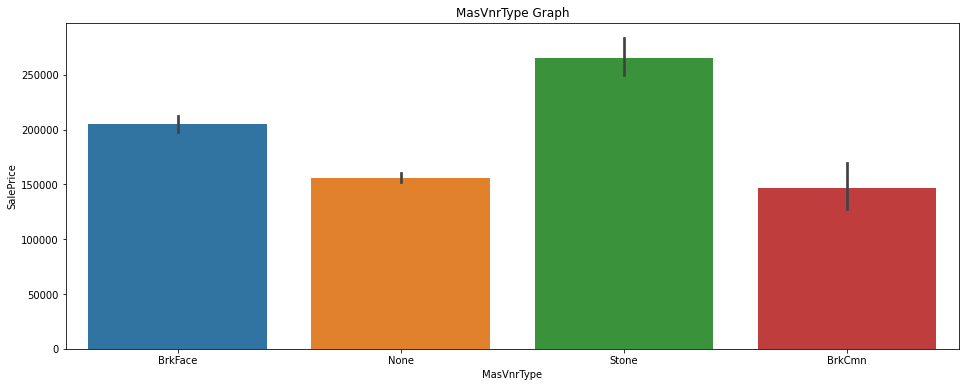

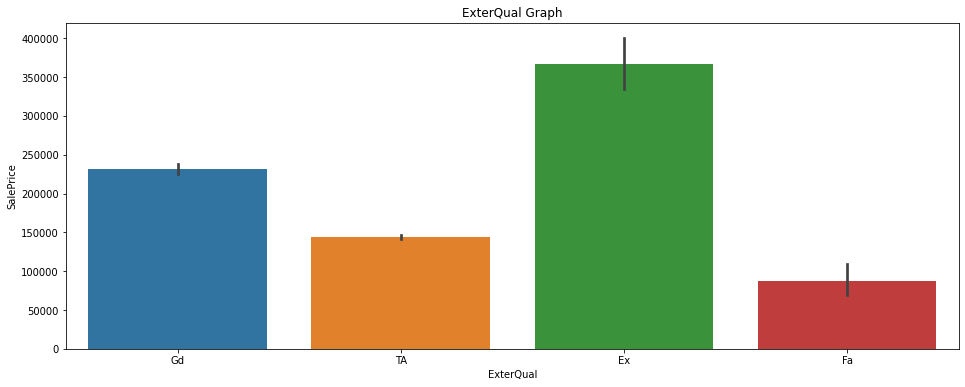

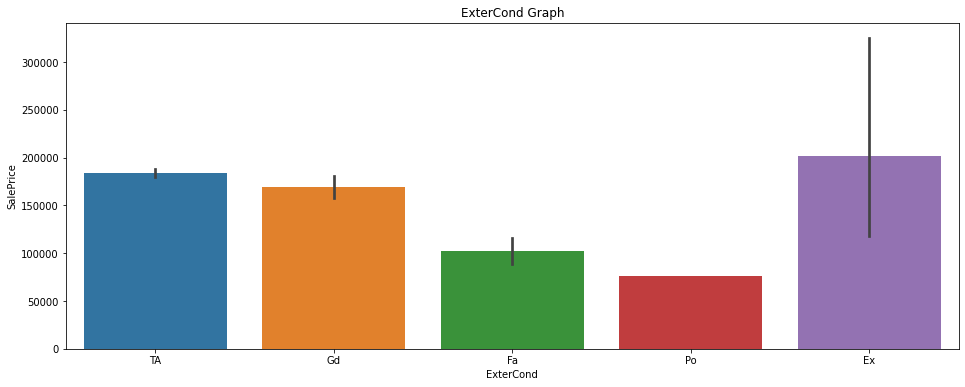

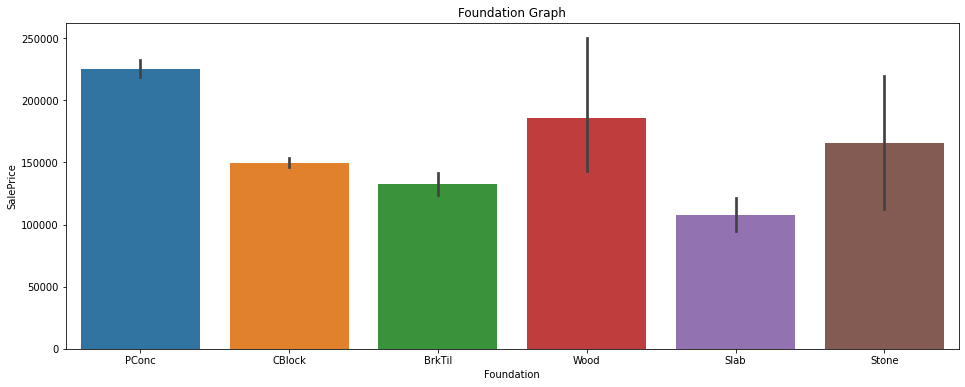

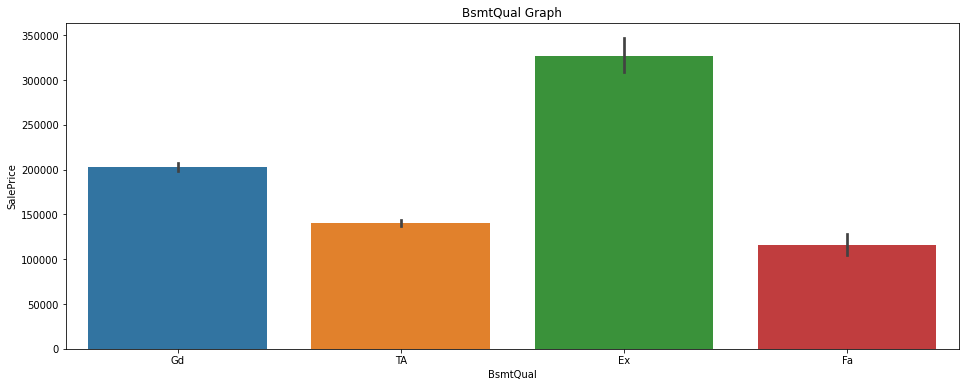

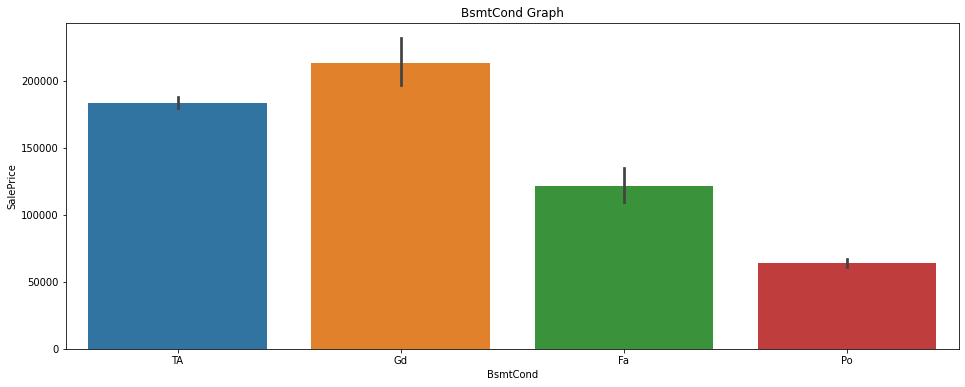

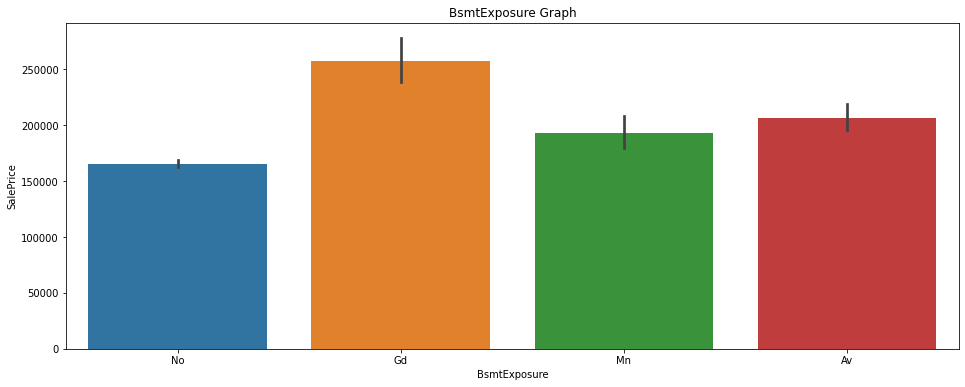

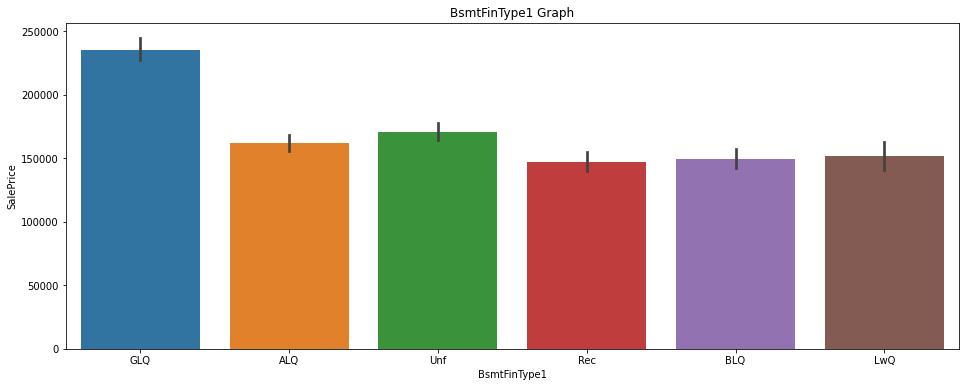

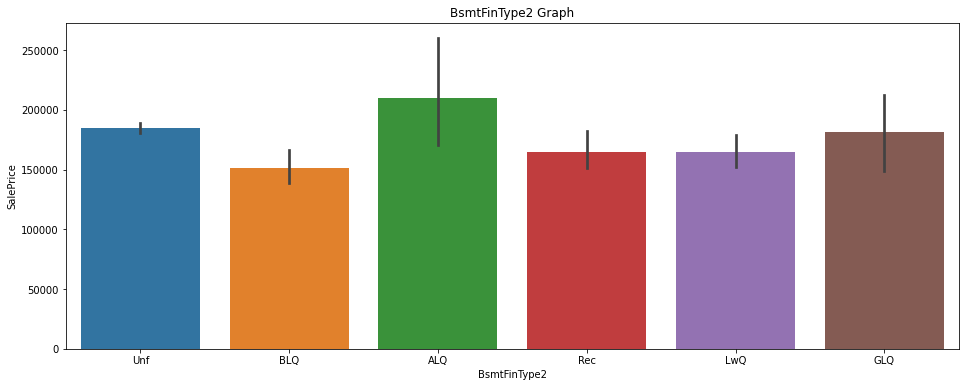

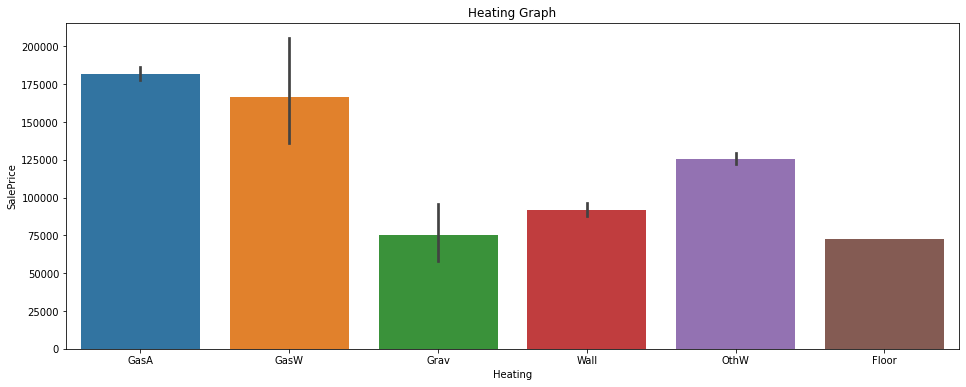

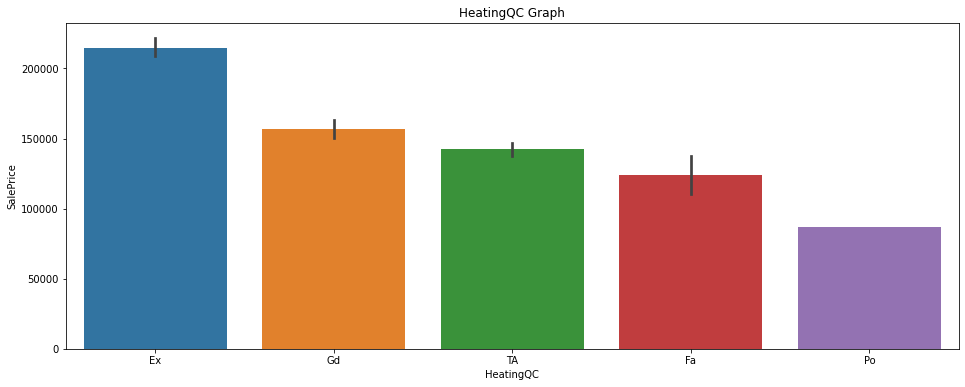

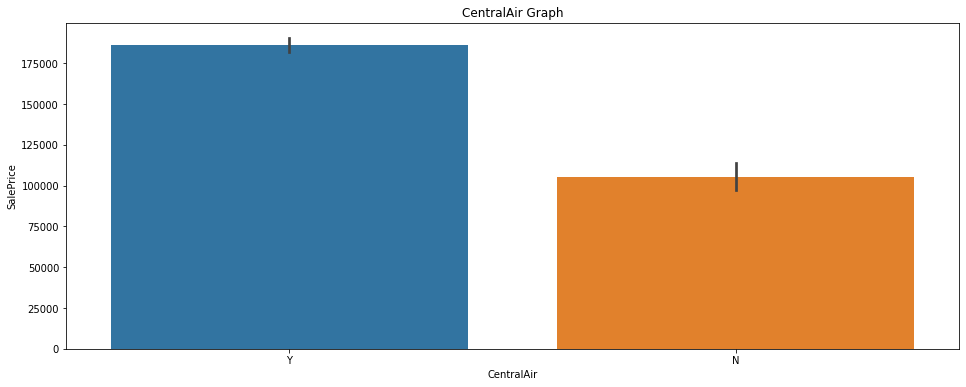

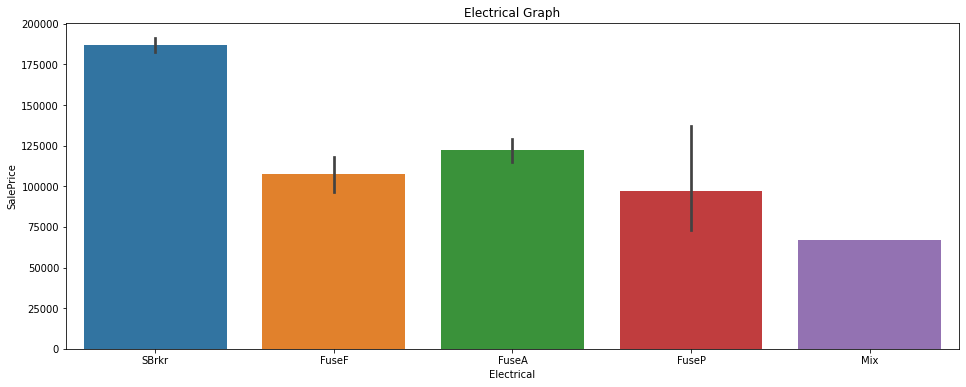

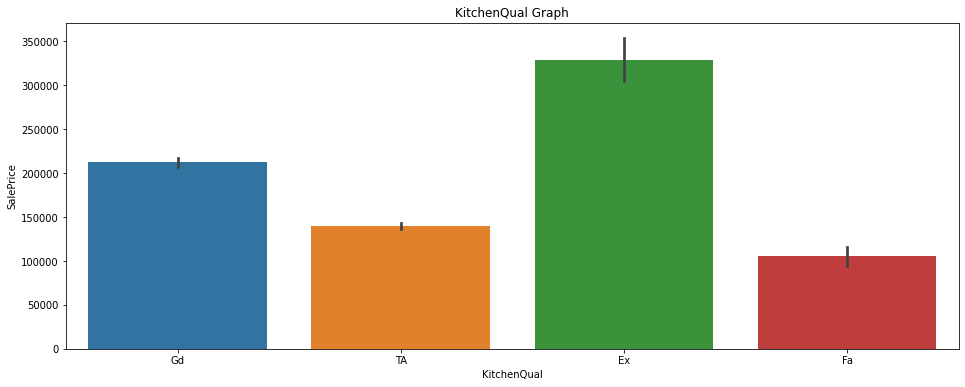

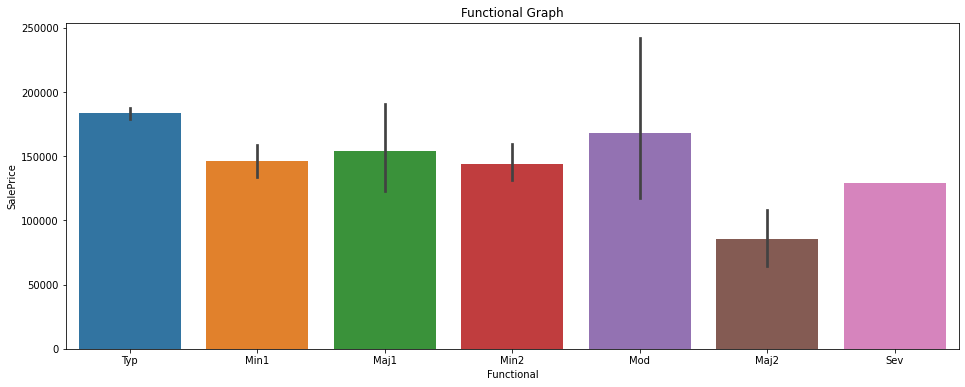

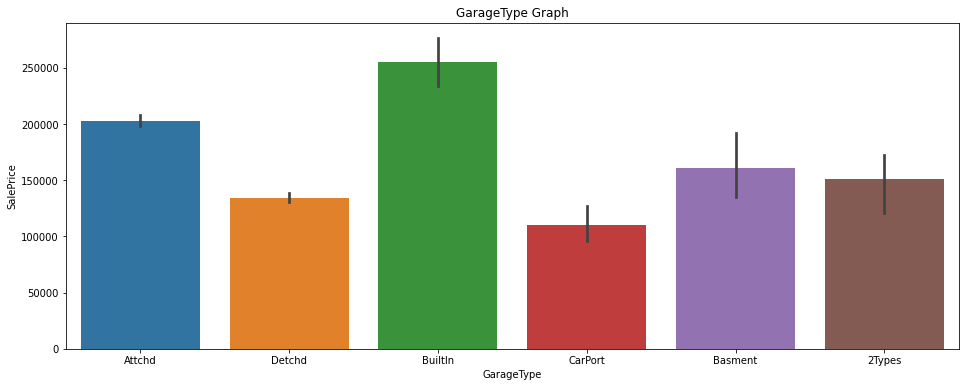

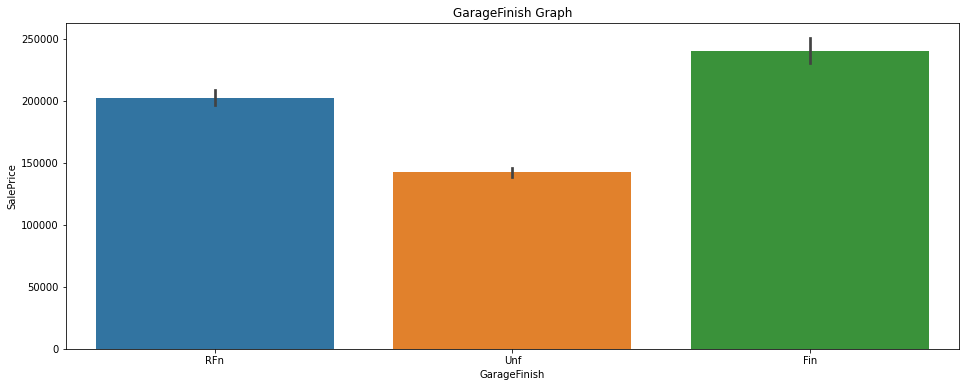

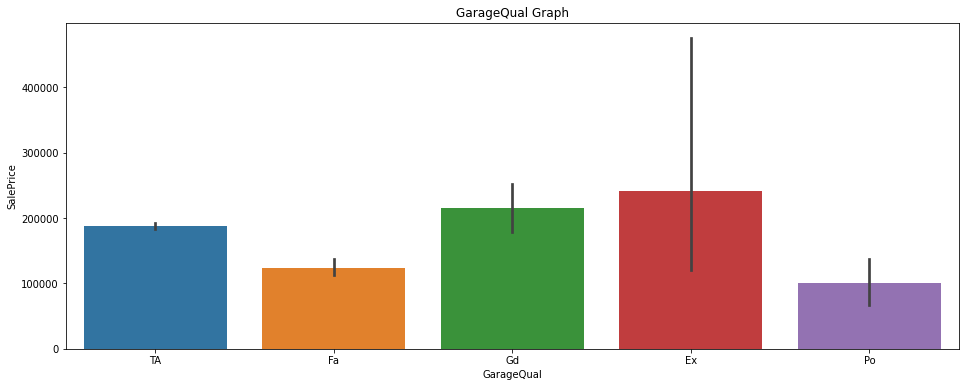

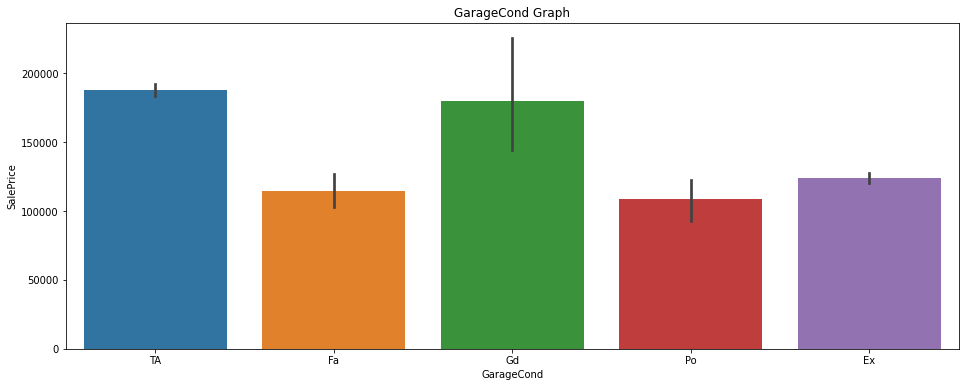

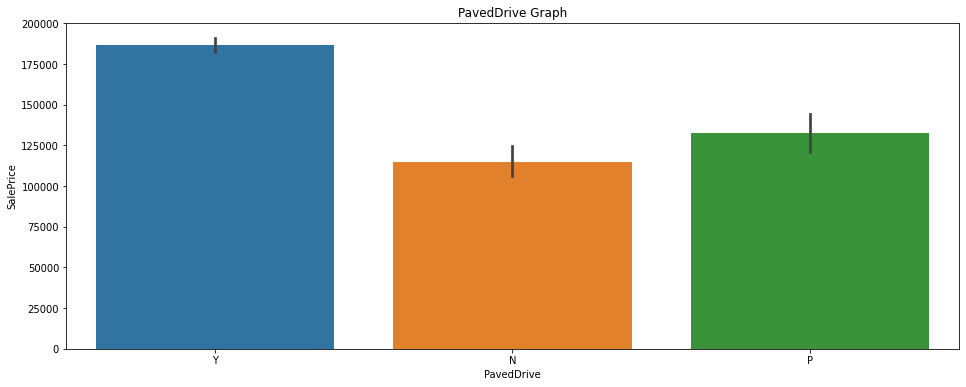

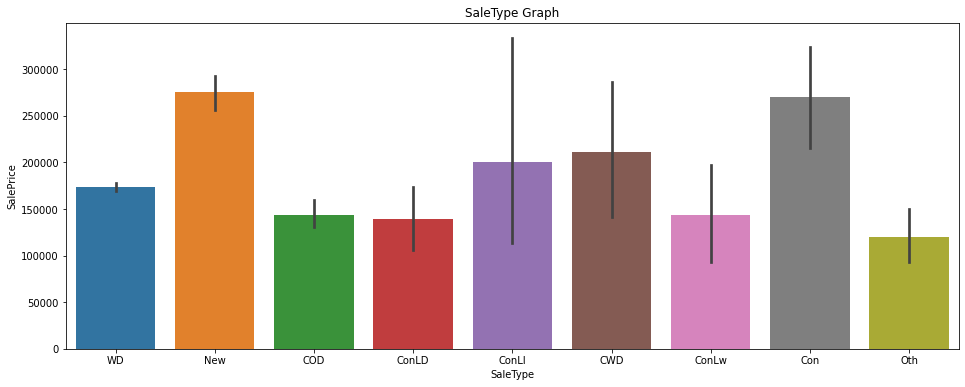

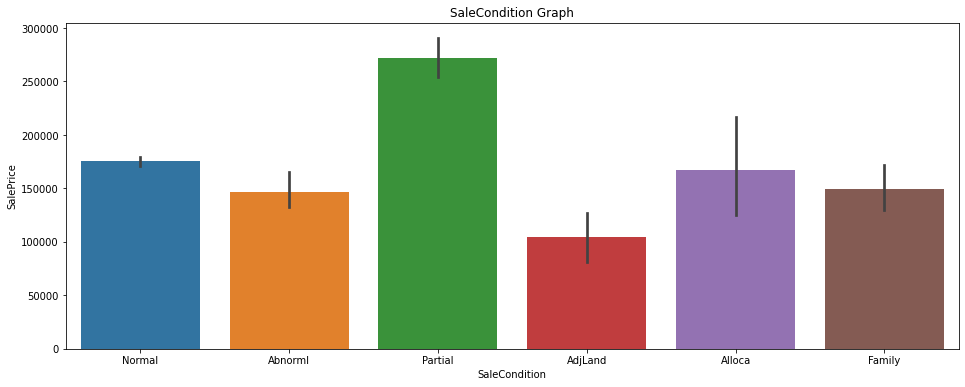

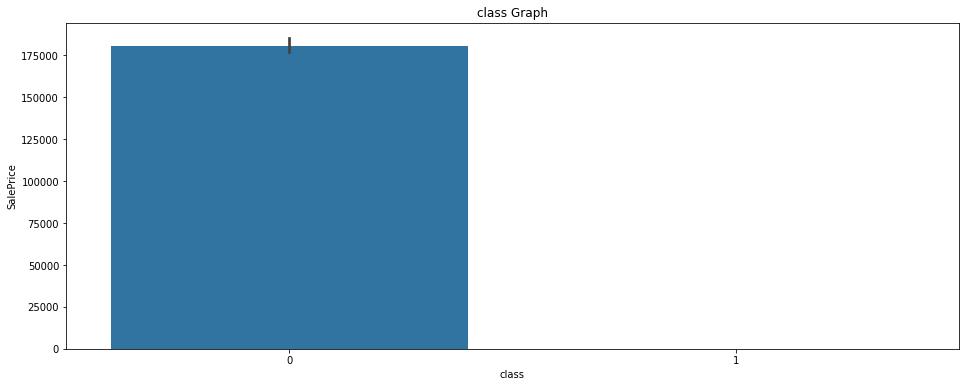

In [34]:
# Plot Categorical Data

for i in data_cat.columns:
  plt.figure(figsize=(16,6))
  plt.xlabel(i)
  plt.ylabel('SalePrice')
  title = i +' Graph'
  plt.title(title)
  sns.barplot(data=data, x=data.loc[:,i], y='SalePrice')
  plt.show()

In [40]:
# Define target for modeling

y = data['SalePrice'].iloc[:1460]

In [36]:
# Encode feature with get_dummies

data_cat = pd.get_dummies(data_cat)

X = pd.concat([data_num.reset_index(drop=True), data_cat.reset_index(drop=True)], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_No SaleType,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


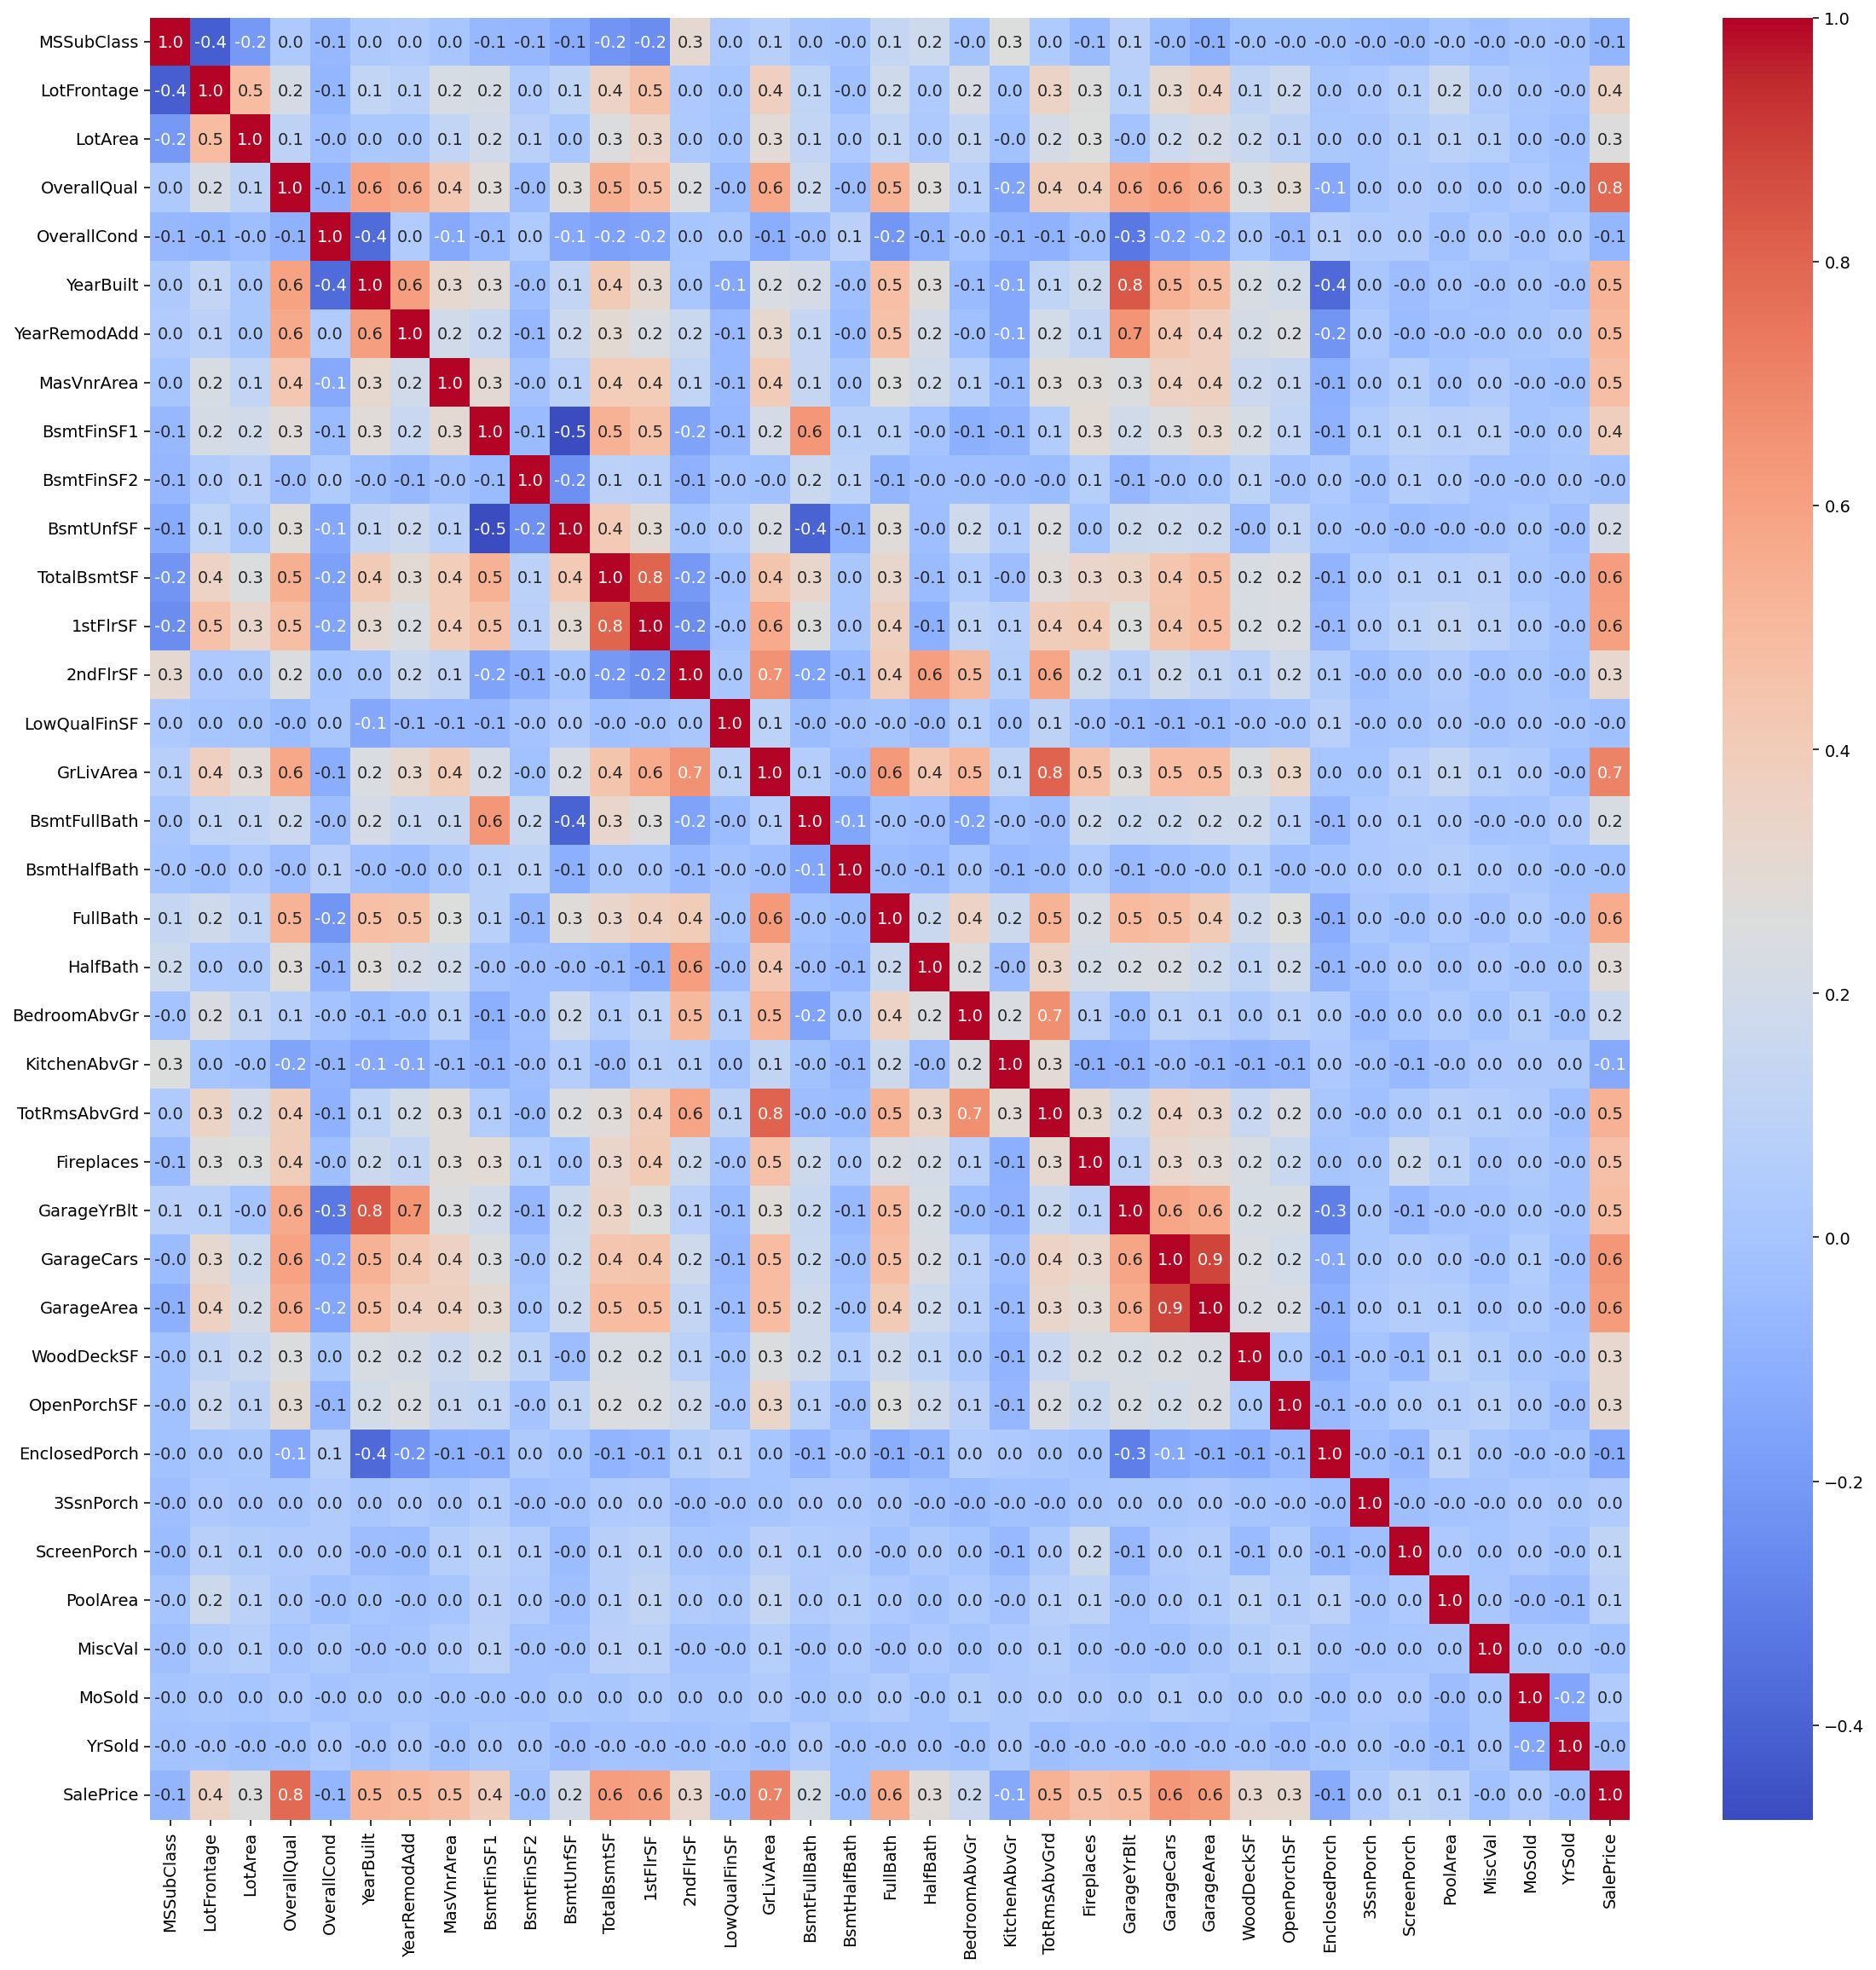

In [37]:
# Check correlation

plt.figure(figsize=(20, 20), dpi=140)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.1f')

In [38]:
# Seperate Dataset

train_df = X[X['class'] == 0]
train_df.drop('class', axis=1, inplace=True)

test_df = X[X['class'] == 1]
test_df.drop('class', axis=1, inplace=True)

### **Modeling**

In [41]:
# Splitting Data

X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=22)

**Random Forest Regressor**

In [42]:
# Import Model

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=800, random_state=22)

In [67]:
# Fitting Model

rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=800, random_state=22)

In [68]:
y_pred_rfr = rfr.predict(X_test)

In [69]:
rfr_score = r2_score(y_test, y_pred_rfr)

In [70]:
print('Score : ', rfr_score)

Score :  0.9994728246505649


**Logistic Regression**

In [76]:
# Import Model

from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=22)

In [77]:
# Fitting Model

log.fit(X_train, y_train)

LogisticRegression(random_state=22)

In [78]:
y_pred_log = log.predict(X_test)

In [79]:
log_score = r2_score(y_test, y_pred_log)

In [112]:
final_score = pd.DataFrame({'Regressors':['RandomForestRegressor', 'LogisticRegression'], 'Score':[rfr_score, log_score]})
final_score

,Regressors,Score
0,RandomForestRegressor,0.999473
1,LogisticRegression,0.609002


**Submission**

In [95]:
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':rfr.predict(test_df)})
submission.head()

,Id,SalePrice
0,1461,163132.1875
1,1462,163123.6250
2,1463,163187.0625
3,1464,163085.8750
4,1465,162973.6750
